# Credit Card Customer Segmentation

<b>Background:</b> 

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

 

<b>Objective:</b> 

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

 

<b>Key Questions:</b>

- How many different segments of customers are there?
- How are these segments different from each other?
- What are your recommendations to the bank on how to better market to and service these customers?
 

<b>Data Description:</b> 

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

- Customer key - Identifier for the customer
- Average Credit Limit - Average credit limit across all the credit cards
- Total credit cards - Total number of credit cards
- Total visits bank - Total number of bank visits
- Total visits online - total number of online visits
- Total calls made - Total number of calls made by the customer
 

<b>Steps to follow:</b> 

1) Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)

2) Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)

3) Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

4) Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

5) Calculate average silhouette score for both methods. (5 marks)

6) Compare K-means clusters with Hierarchical clusters. (5 marks)

7) Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)


In [1]:
# import standard libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
#import data and view header
ccData = pd.read_excel('Credit Card Customer Data.xlsx')
ccData.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
#view properties of data
ccData.shape, ccData.info(), display(ccData.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


((660, 7), None, None)

# PLACEHOLDER FOR ANALYSIS

In [4]:
# Sl_No and customer key are identifiers and add no value to recognizing patterns, create a new matrix without those columns
ccData.drop(['Sl_No', 'Customer Key'], axis = 1, inplace=True)

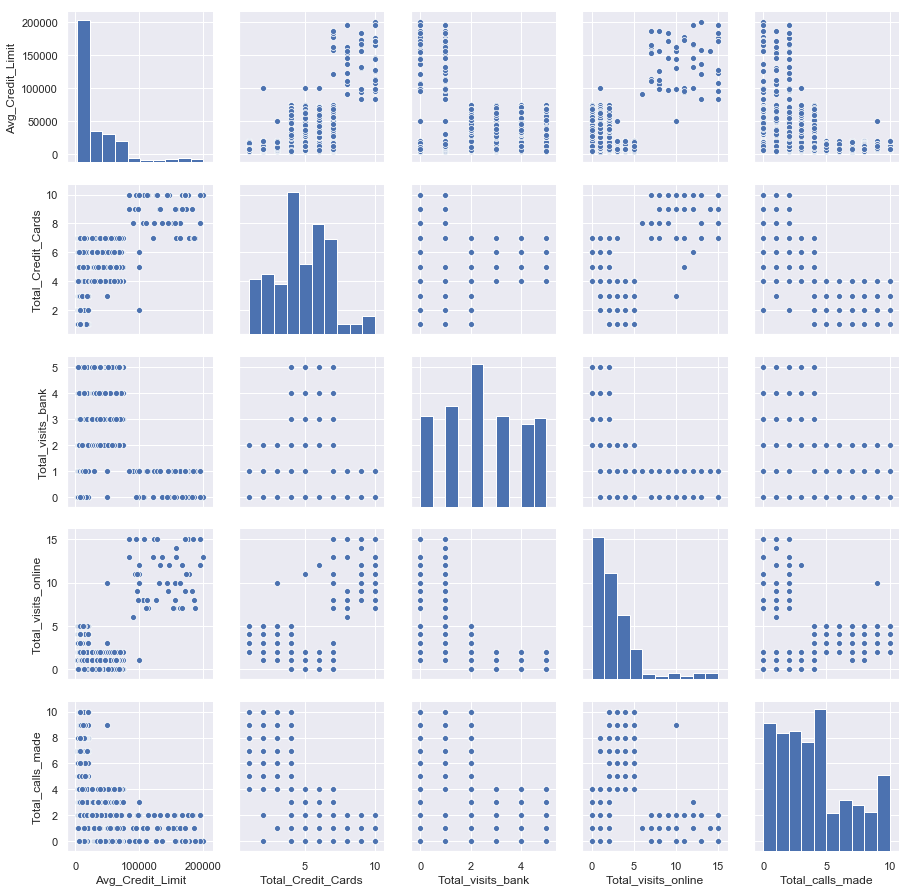

In [5]:
sns.pairplot(ccData)
plt.show()

In [6]:
#scale data using z score
from scipy.stats import zscore
ccDataScaled = ccData.apply(zscore)
ccDataScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


C:\Users\jharnack\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


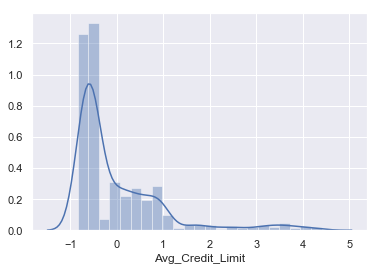

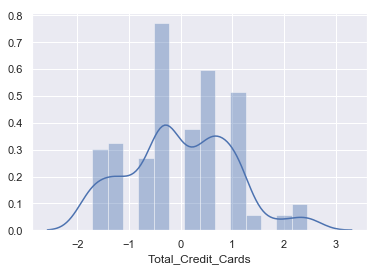

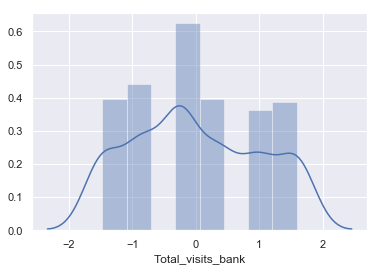

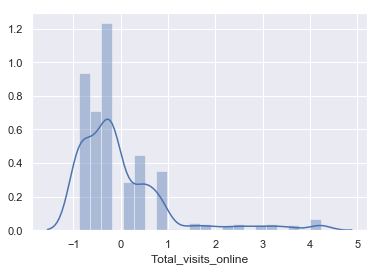

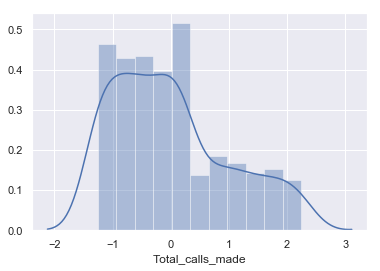

In [7]:
#look at histogram/distplot of scaled data to identify clusters
for i in ccDataScaled.columns:
    sns.distplot(ccDataScaled[i])
    plt.show()

## K Means Clustering

- Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

In [8]:
#import KMeans from sklearn
from sklearn.cluster import KMeans

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(ccDataScaled)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3300.000000
1,2,2040.989816
2,3,933.043749
3,4,780.773690
4,5,704.475919
5,6,642.473251
6,7,600.251696
7,8,567.043690
8,9,538.724101
9,10,516.429855


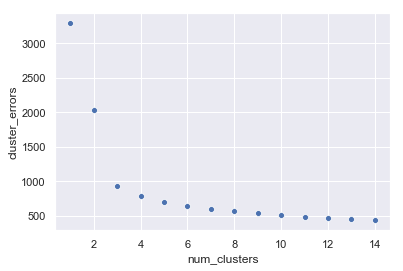

In [9]:
sns.scatterplot(x = clusters_df['num_clusters'], y = clusters_df['cluster_errors'])
plt.show()

In [10]:
cluster_final = KMeans(n_clusters = 3, n_init= 5)
cluster_final.fit(ccDataScaled)
group = cluster_final.predict(ccDataScaled)
ccData['Group'] = group
ccDataScaled['Group'] = group
display(ccData.head(10), ccDataScaled.head(10))

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2
5,20000,3,0,1,8,1
6,100000,5,0,11,2,2
7,15000,3,0,1,1,1
8,5000,2,0,2,2,1
9,3000,4,0,1,7,1


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,1
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,2
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,1
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,1
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,1


In [11]:
# view group statistics - average for each group and total customers sorted into each group
display(ccData.groupby(['Group']).mean().round(2))
ccData['Group'].value_counts()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,33782.38,5.52,3.49,0.98,2.00
1,12174.11,2.41,0.93,3.55,6.87
2,141040.00,8.74,0.60,10.90,1.08


0    386
1    224
2     50
Name: Group, dtype: int64

C:\Users\jharnack\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\jharnack\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\jharnack\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (wh

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000294E7AA7198>,
      dtype=object)

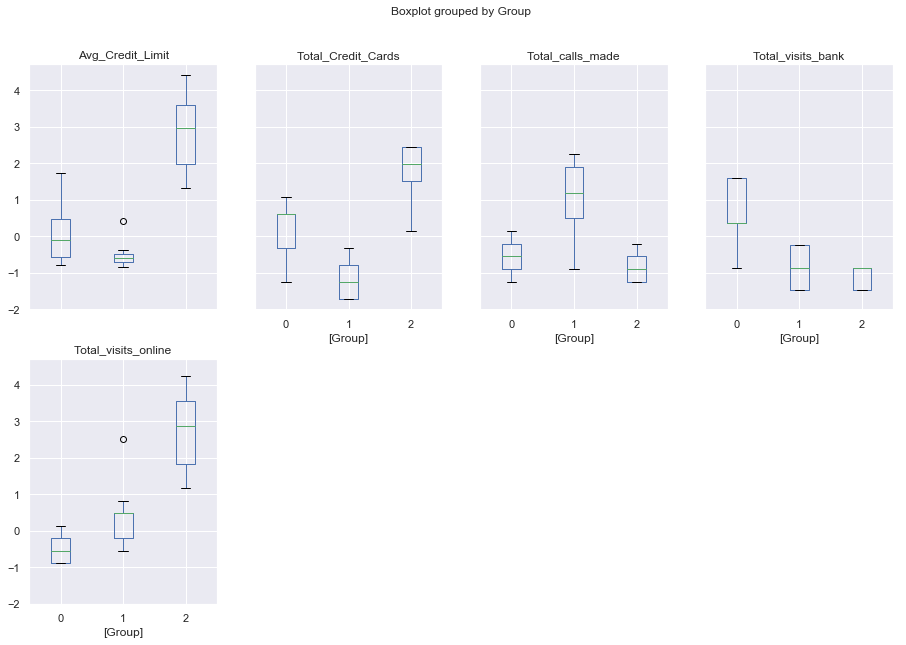

In [12]:
# generate boxplots by group using scaled data
ccDataScaled.boxplot(by = 'Group', layout = (2,4), figsize = (15,10))

### Takeaways from K Means Clusters

Group 0: This is the largest group with > 50% of the population. They prefer to bank in-person instead of online or via telephone, relative to the other groups. They have more credit cards and a higher credit limit compared to Group 1, and these customers could be classified as the "average" customer of the bank.

Group 1: This is the second largest group, with ~1/3 of the population. They have the lowest number of credit cards and lowest credit limit. They prefer to call the bank relative to other groups. From a spending perspective, these are likely the least profitable customers for the bank.

Group 2: This is the smallest group, with < 10% of the total population. This group had the highest credit limit and number of credit cards, used the lowest in-person and telephone support channels, while making the most online visits. This group could be classified as tech-savvy, high spending clients that cost the bank little in support services while spending the most on credit cards (and thus generating a lot of fees through transactions). One potential way to improve service for these wealthy clients is to improve the online experience for contacting the bank, sicne that is their preferred method of communication.

## Hierarchical Clustering

- Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)


In [13]:
#import libraries for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist

In [14]:
# calculate Z using different linkage methods (ward, complete, average, single), compare results using cophenetic 

#create array with differnet methods for calculating Z
link = ['ward', 'complete', 'average', 'single']

#create dataframe to compare cophenetic results by method
coph_res = pd.DataFrame(index = ['Cophenetic'])

#drop grouping data from previous KMeans clustering
ccDataScaled.drop(columns='Group', inplace=True)
ccDataScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [15]:
#experiment with different methods for calculating Z, create for loop to try 4 different methods using previous array
for i in link:
    Z = linkage(ccDataScaled, metric='euclidean', method=i)
    c, coph = cophenet(Z, pdist(ccDataScaled))
    coph_res[i] = [c]


display(coph_res.round(3))

,ward,complete,average,single
Cophenetic,0.742,0.86,0.898,0.739


In [16]:
# best cophenetic score is when method is set to "average"
# recalculate Z 

Z = linkage(ccDataScaled, metric= 'euclidean', method='average')
print(Z, Z.shape)

[[ 464.          497.            0.            2.        ]
 [ 250.          361.            0.            2.        ]
 [ 252.          324.            0.            2.        ]
 ...
 [   0.         1309.            3.11135778  387.        ]
 [1315.         1316.            3.25253923  610.        ]
 [1314.         1317.            5.45418035  660.        ]] (659, 4)


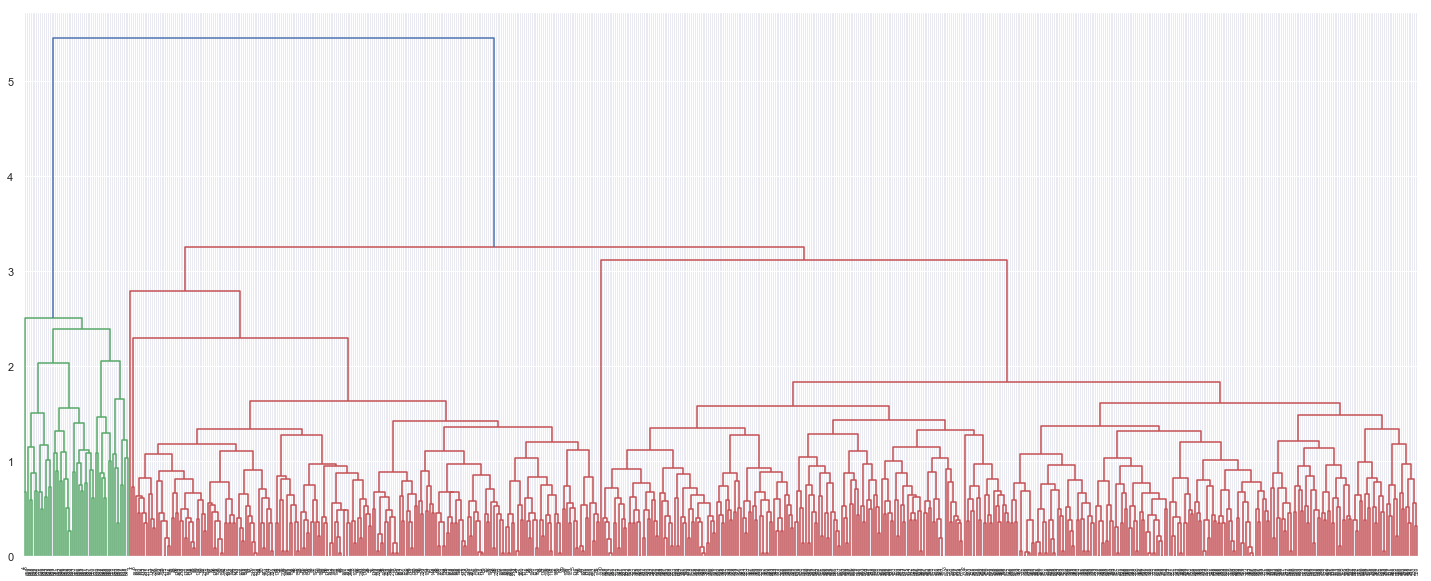

In [17]:
#graph dendrogram
plt.figure(figsize=(25,10))
dendrogram(Z)
plt.show()

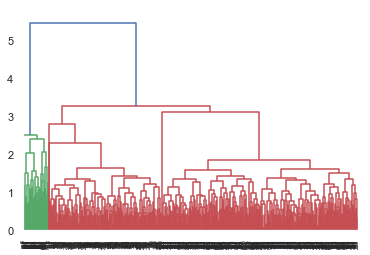

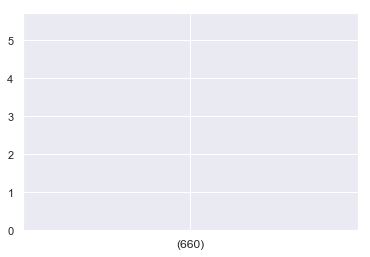

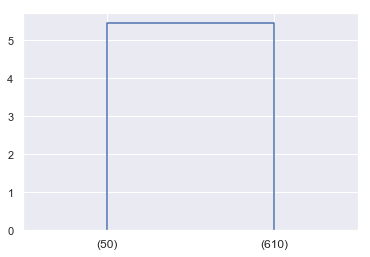

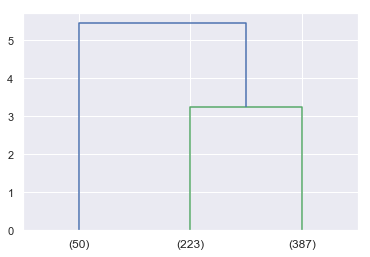

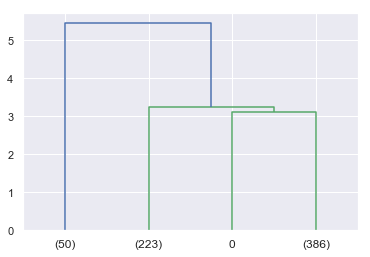

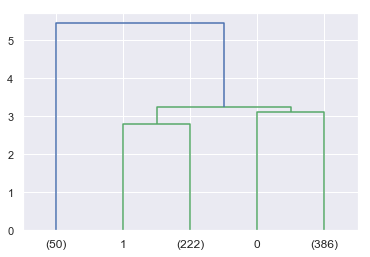

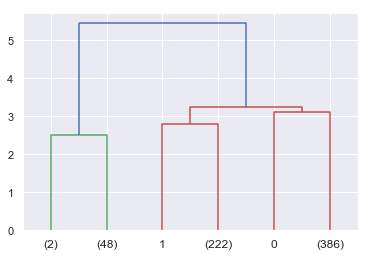

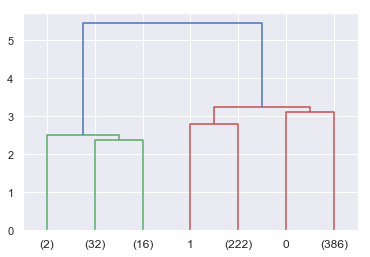

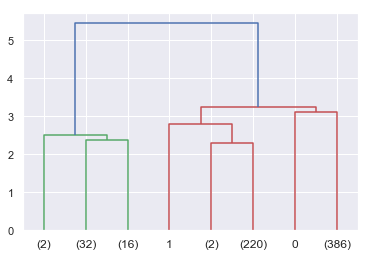

In [18]:
# 3 clusters appear fairly straightforward from above dendrogram
# next create a loop to cutoff dendrogram at various # of groups and see how many values are sorted in each 
x = range(0,9) 
for i in x:
    dendrogram(Z, truncate_mode='lastp', p = i)
    plt.show()

### Dendrogram analysis
For the above dendrograms, there is a good inflection point at 3 groups, similar to K Means above. With 1 group, there's 660, 2 groups, there are 50 and 610, and three groups are 50, 224, and 386. After 3 groups, there is very diminishing returns as some "Groups" only have 1 customer. 

Groups 2 and 3 are fairly similar so they could potentially be grouped into a single group, depending on how granular the bank needs to be with its customer segmentation.

In [19]:
#run agglomaterive clustering with 3 clustersa and average linkage
agglo = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
agglo.fit(ccDataScaled)
agglo.labels_

array([0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
#recombine labels with original data
ccData['Group'] = agglo.labels_
ccDataScaled['Group'] = agglo.labels_
display(ccData.head(), ccDataScaled.head())

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1


C:\Users\jharnack\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\jharnack\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\jharnack\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (wh

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000294E61C0DA0>,
      dtype=object)

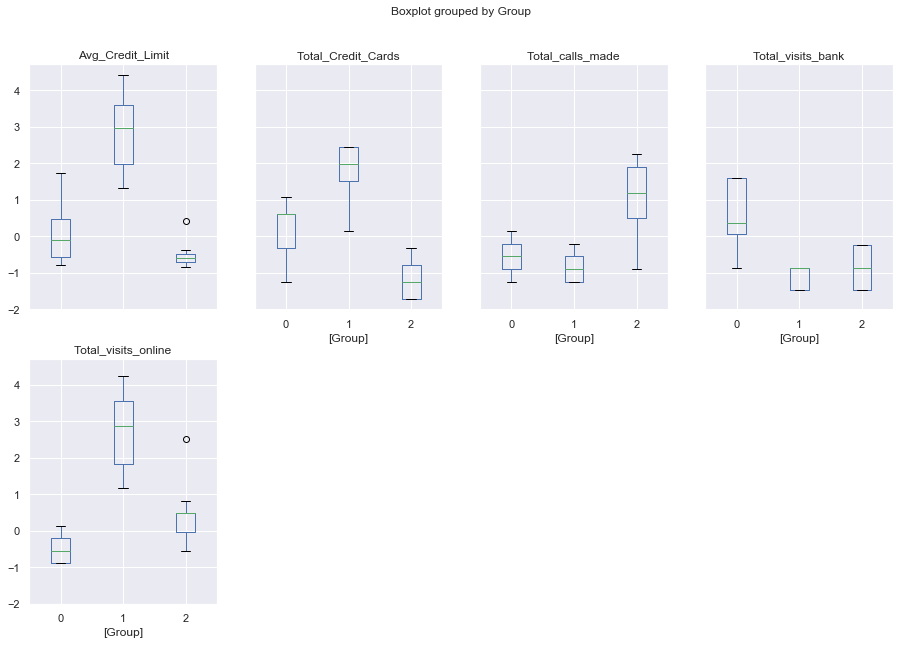

In [21]:
# boxplots of scaled data
ccDataScaled.boxplot(by = 'Group', layout = (2,4), figsize = (15,10))

### Analysis of Hierarchical Clustering

Group 0

Group 1

Group 2

## Sillhouette Score and Comparison Between K Means and Hierarchical Clustering


- Calculate average silhouette score for both methods. (5 marks)

- Compare K-means clusters with Hierarchical clusters. (5 marks)

In [22]:
#import silhouette score
from sklearn.metrics import silhouette_score

#drop labels from original group
ccDataScaled.drop(['Group'], axis=1,inplace = True)
ccDataScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [23]:
#calculate hierarchical silhouette score
print('The silhouette score for agglomerative hierarchical clustering is', silhouette_score(ccDataScaled, agglo.labels_).round(5))

print('The silhouette score for K Means clustering is', silhouette_score(ccDataScaled, group).round(5))

The silhouette score for agglomerative hierarchical clustering is 0.51592
The silhouette score for K Means clustering is 0.51572


## Final Analysis
- Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)
- How many different segments of customers are there?
- How are these segments different from each other?
- What are your recommendations to the bank on how to better market to and service these customers?
